<a href="https://colab.research.google.com/github/turatsinzejunior83/.net-apps/blob/master/Machine_Learning_Model_for_Chronic_Diseases_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Predict Chronical Diseases Applied Diabetes


In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import tensorflow as tf
from sklearn.model_selection import train_test_split, cross_val_predict, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from lazypredict.Supervised import LazyClassifier 



In [ ]:
!pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install lazypredict LinearSVC

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 65.6 MB/s eta 0:00:00


In [ ]:

df= pd.read_csv("diabetes.csv")
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.60,0.63,50,1
1,1,85,66,29,0,26.60,0.35,31,0
2,8,183,64,0,0,23.30,0.67,32,1
3,1,89,66,23,94,28.10,0.17,21,0
4,0,137,40,35,168,43.10,2.29,33,1


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,120.89,69.11,20.54,79.80,31.99,0.47,33.24,0.35
std,3.37,31.97,19.36,15.95,115.24,7.88,0.33,11.76,0.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00,0.00
25%,1.00,99.00,62.00,0.00,0.00,27.30,0.24,24.00,0.00
50%,3.00,117.00,72.00,23.00,30.50,32.00,0.37,29.00,0.00
75%,6.00,140.25,80.00,32.00,127.25,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


**Data Visualization**

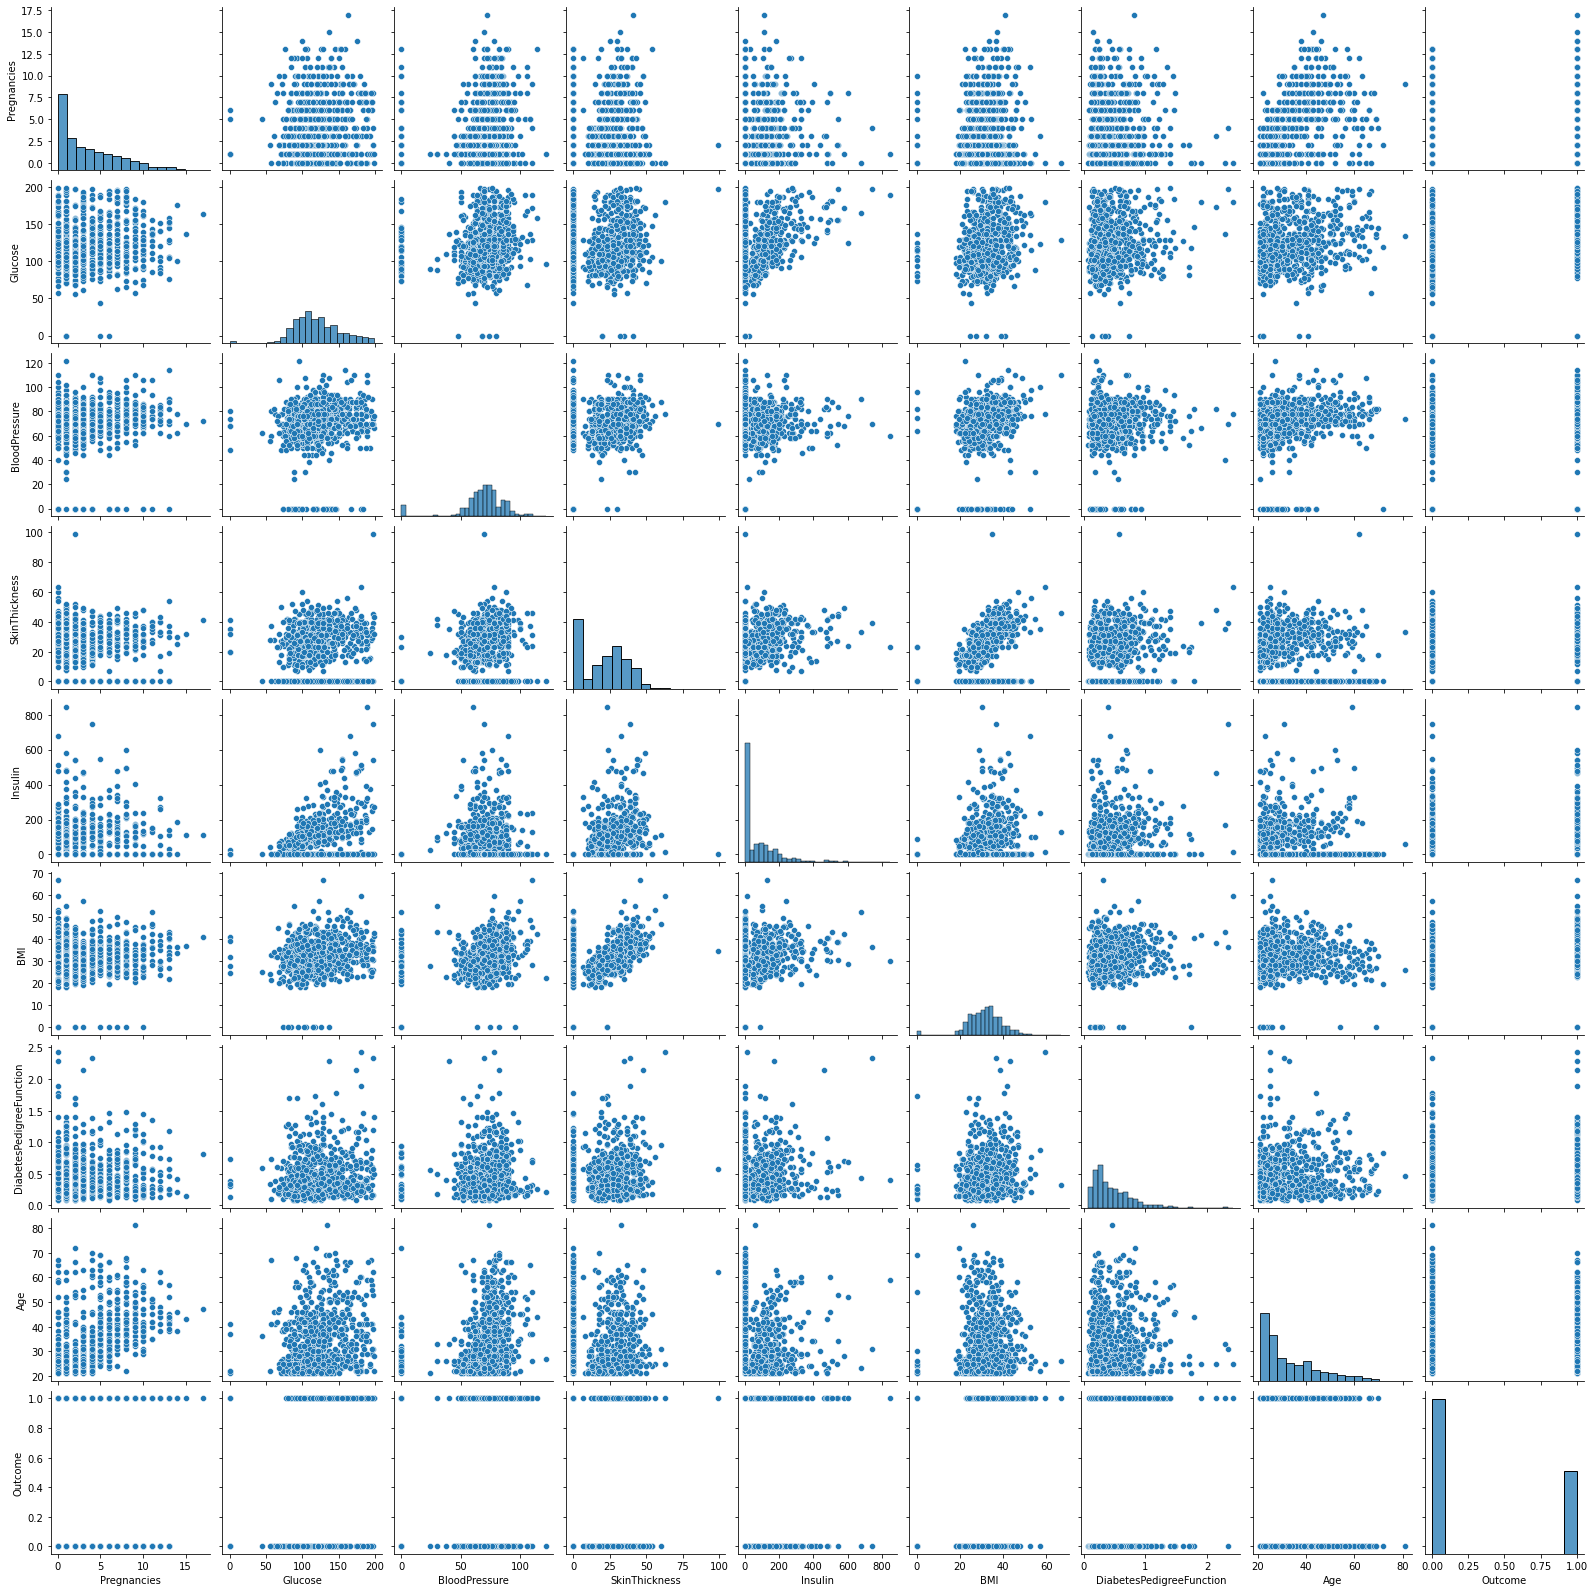

In [ ]:
from pandas.core.apply import SpecificationError
from os import supports_effective_ids
def figure(num=None,  # autoincrement if None, else integer from 1-N
           figsize=None,  # defaults to rc figure.figsize
           dpi=None,  # defaults to rc figure.dpi
           facecolor=supports_effective_ids,  # defaults to rc figure.facecolor
           edgecolor=SpecificationError,  # defaults to rc figure.edgecolor
           frameon=True,
          
           clear=False,
           **kwargs
           ):
  plt.figure(figsize=(10,10), dpi = 300)
           
 
sns.pairplot(df)
plt.show()

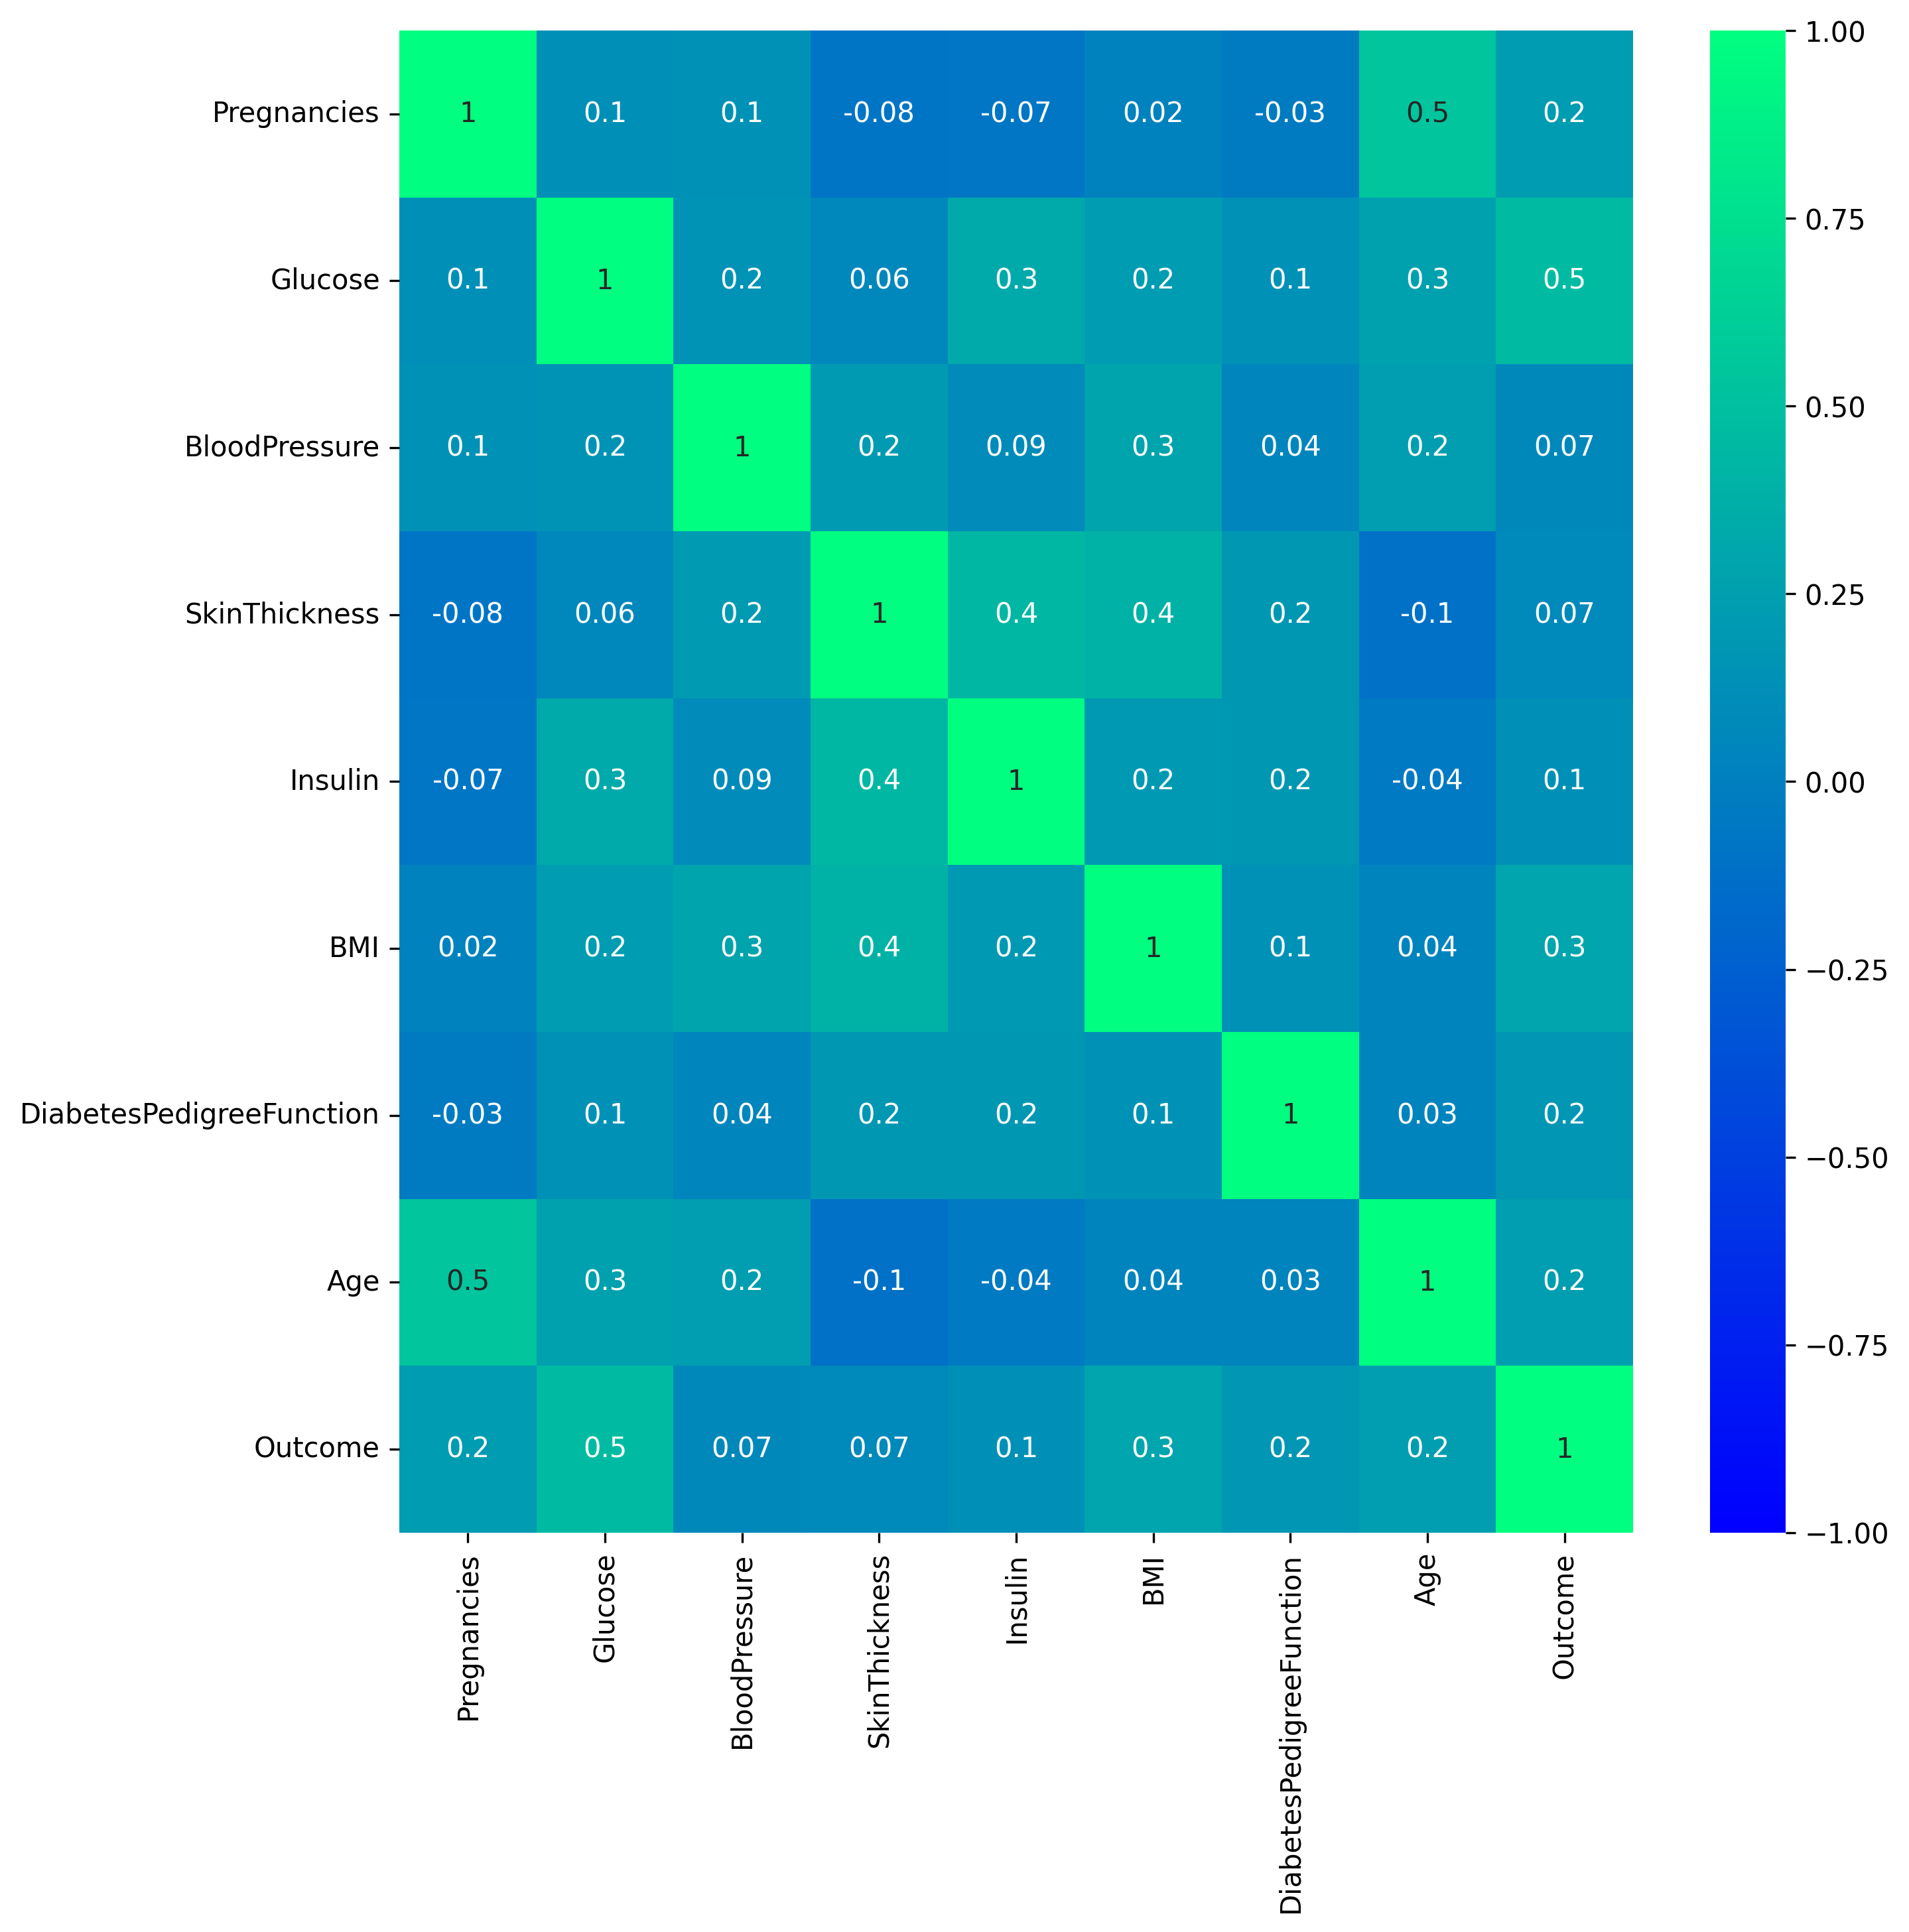

In [ ]:
plt.figure(figsize=(10,10), dpi = 300)
sns.heatmap(
data = df.corr(),
 annot=True,fmt= '0.1g',
 vmin=-1,
 cmap='winter')
plt.show()

In [ ]:
X = df.drop(columns=["Outcome", "Insulin", "BMI", "DiabetesPedigreeFunction"])
y = df["Outcome"]

Scaling

In [ ]:
scaler = StandardScaler()
T = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [ ]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Age
0              6      148             72             35   50
1              1       85             66             29   31
2              8      183             64              0   32
3              1       89             66             23   21
4              0      137             40             35   33
..           ...      ...            ...            ...  ...
763           10      101             76             48   63
764            2      122             70             27   27
765            5      121             72             23   30
766            1      126             60              0   47
767            1       93             70             31   23

[768 rows x 5 columns]


Data spliting

In [ ]:
X_train = X[:-100]
X_test = X[-100:]
y_train = y[:-100]
y_test = y[-100:]

**Training and Prediction Result**


1.Tensor Flow Model

In [ ]:
inputs = tf.keras.Input(shape=(5,))
x = tf.keras.layers.Dense(32, activation='relu')(inputs)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)
model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'])


In [ ]:
EPOCHS = 280
BATCH_SIZE = 32

In [ ]:
history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1
)

Epoch 1/280
17/17 [==============================] - 1s 18ms/step - loss: 2.9240 - accuracy: 0.5955 - val_loss: 1.9288 - val_accuracy: 0.6045
Epoch 2/280
17/17 [==============================] - 0s 4ms/step - loss: 2.1496 - accuracy: 0.6161 - val_loss: 1.4919 - val_accuracy: 0.6343
Epoch 3/280
17/17 [==============================] - 0s 7ms/step - loss: 1.7469 - accuracy: 0.6236 - val_loss: 1.2355 - val_accuracy: 0.6567
Epoch 4/280
17/17 [==============================] - 0s 6ms/step - loss: 1.4349 - accuracy: 0.6142 - val_loss: 0.9393 - val_accuracy: 0.6940
Epoch 5/280
17/17 [==============================] - 0s 6ms/step - loss: 1.1024 - accuracy: 0.6423 - val_loss: 0.7759 - val_accuracy: 0.7239
Epoch 6/280
17/17 [==============================] - 0s 6ms/step - loss: 0.9027 - accuracy: 0.6610 - val_loss: 0.7346 - val_accuracy: 0.7015
Epoch 7/280
17/17 [==============================] - 0s 5ms/step - loss: 0.8554 - accuracy: 0.6779 - val_loss: 0.7734 - val_accuracy: 0.6194
Epoch 8/280


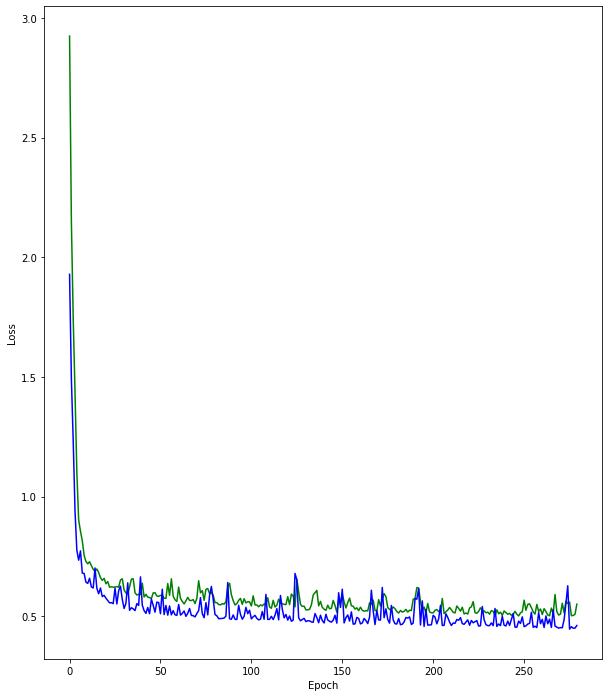

In [ ]:
plt.figure(figsize=(10, 12))

plt.plot(range(EPOCHS), history.history['loss'], color='g')
plt.plot(range(EPOCHS), history.history['val_loss'], color='b')

plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.show()

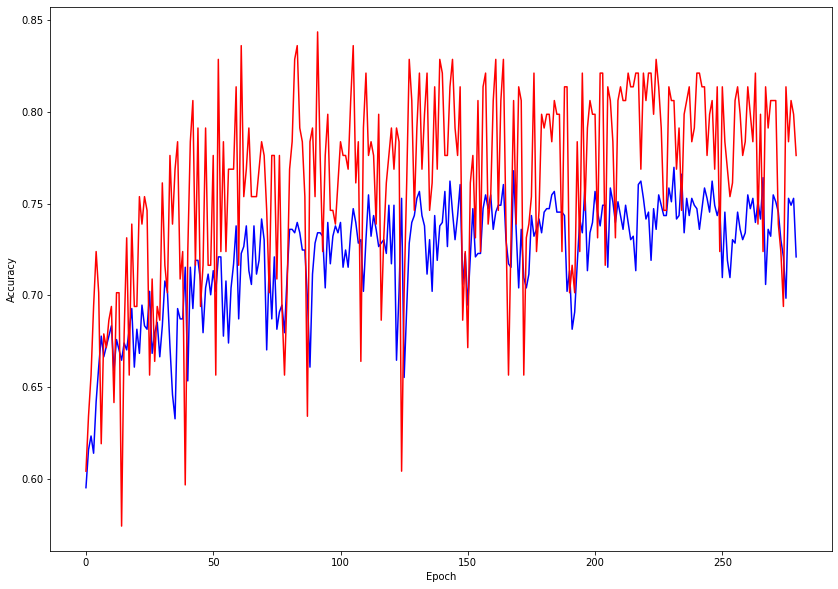

In [ ]:
plt.figure(figsize=(14, 10))

plt.plot(range(EPOCHS), history.history['accuracy'], color='b')
plt.plot(range(EPOCHS), history.history['val_accuracy'], color='r')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.show()

Model Accuracy: 0.7200000286102295
4/4 [==============================] - 0s 3ms/step


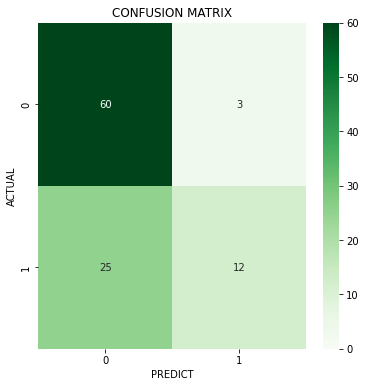

ClASSIFICATION REPORT:
----------------------
               precision    recall  f1-score   support

           0       0.71      0.95      0.81        63
           1       0.80      0.32      0.46        37

    accuracy                           0.72       100
   macro avg       0.75      0.64      0.64       100
weighted avg       0.74      0.72      0.68       100



In [ ]:
print(f"Model Accuracy: {model.evaluate(X_test, y_test, verbose=0)[1]}")
pred = np.squeeze(model.predict(X_test)>=0.5).astype(np.int)
cm = confusion_matrix(y_test, pred)
clr = classification_report(y_test, pred)
    
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True,fmt= 'g', vmin=0, cmap='Greens')
plt.xticks(ticks=np.arange(2) + 0.5)
plt.yticks(ticks=np.arange(2) + 0.5)
plt.xlabel("PREDICT")
plt.ylabel("ACTUAL")
plt.title("CONFUSION MATRIX")
plt.show()
print("ClASSIFICATION REPORT:\n----------------------\n", clr)

In [ ]:

clf = LazyClassifier(verbose=0,predictions=True)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

100%|██████████| 29/29 [00:01<00:00, 19.62it/s]


In [ ]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
NearestCentroid,0.77,0.77,0.77,0.77,0.02
LinearSVC,0.80,0.76,0.76,0.79,0.04
LogisticRegression,0.80,0.76,0.76,0.79,0.03
RidgeClassifierCV,0.80,0.76,0.76,0.79,0.02
CalibratedClassifierCV,0.80,0.76,0.76,0.79,0.11
RidgeClassifier,0.80,0.76,0.76,0.79,0.02
AdaBoostClassifier,0.79,0.76,0.76,0.79,0.14
LinearDiscriminantAnalysis,0.79,0.76,0.76,0.78,0.05
BernoulliNB,0.78,0.75,0.75,0.78,0.01


**Other Training** **Model**

In [ ]:
cols=["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction",	"Age",]

df= pd.read_csv("diabetes.csv")
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.60,0.63,50,1
1,1,85,66,29,0,26.60,0.35,31,0
2,8,183,64,0,0,23.30,0.67,32,1
3,1,89,66,23,94,28.10,0.17,21,0
4,0,137,40,35,168,43.10,2.29,33,1


Text(0.5, 1.0, 'Distribution Plot of Pregnancies')

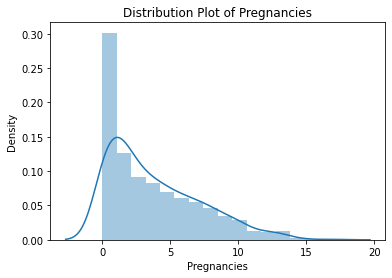

In [ ]:
sns.distplot(df.Pregnancies)
plt.title("Distribution Plot of Pregnancies")



Text(0.5, 1.0, 'Distribution Plot of Glucose')

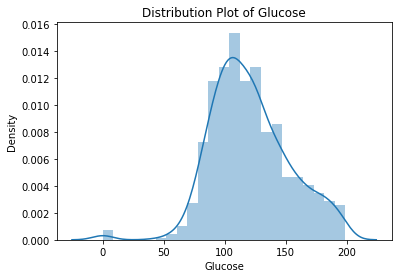

In [ ]:
sns.distplot(df.Glucose)
plt.title("Distribution Plot of Glucose")



**Train, validation, test datasets**

In [ ]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [ ]:
from imblearn.over_sampling import RandomOverSampler
def scale_dataset(dataframe, oversample=False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

  data = np.hstack((X, np.reshape(y, (-1, 1))))

  return data, X, y

In [ ]:
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

**K-Nearest Neighbours(KNN)**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred = knn_model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.77      0.78       101
           1       0.58      0.60      0.59        53

    accuracy                           0.71       154
   macro avg       0.68      0.69      0.69       154
weighted avg       0.72      0.71      0.72       154



**Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

In [ ]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.80      0.81      0.80       101
           1       0.63      0.60      0.62        53

    accuracy                           0.74       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.74      0.74      0.74       154



**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, y_train)
y_pred = lg_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.77      0.80       101
           1       0.62      0.72      0.67        53

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.74       154
weighted avg       0.76      0.75      0.76       154



**Support Vector Classifier(svc)**

In [ ]:
from sklearn.svm import SVC
svm_model = SVC()
svm_model = lg_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.77      0.80       101
           1       0.62      0.72      0.67        53

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.74       154
weighted avg       0.76      0.75      0.76       154



**Neural Net**

In [ ]:
import tensorflow as tf

In [ ]:
nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(32,activation='relu', input_shape=(8,)),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid'),
])
nn_model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = nn_model.fit(
    X_train,y_train, epochs=50, batch_size=32, validation_split=0.2

)

Epoch 1/50
16/16 [==============================] - 1s 24ms/step - loss: 0.6433 - accuracy: 0.6250 - val_loss: 1.0113 - val_accuracy: 0.0082
Epoch 2/50
16/16 [==============================] - 0s 5ms/step - loss: 0.5874 - accuracy: 0.6332 - val_loss: 0.9235 - val_accuracy: 0.1230
Epoch 3/50
16/16 [==============================] - 0s 4ms/step - loss: 0.5486 - accuracy: 0.6742 - val_loss: 0.8512 - val_accuracy: 0.3607
Epoch 4/50
16/16 [==============================] - 0s 4ms/step - loss: 0.5163 - accuracy: 0.7418 - val_loss: 0.7872 - val_accuracy: 0.4918
Epoch 5/50
16/16 [==============================] - 0s 5ms/step - loss: 0.4908 - accuracy: 0.7643 - val_loss: 0.7189 - val_accuracy: 0.6639
Epoch 6/50
16/16 [==============================] - 0s 5ms/step - loss: 0.4699 - accuracy: 0.7930 - val_loss: 0.6983 - val_accuracy: 0.6557
Epoch 7/50
16/16 [==============================] - 0s 9ms/step - loss: 0.4531 - accuracy: 0.7951 - val_loss: 0.6495 - val_accuracy: 0.6885
Epoch 8/50
16/16 [=

In [ ]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.show()

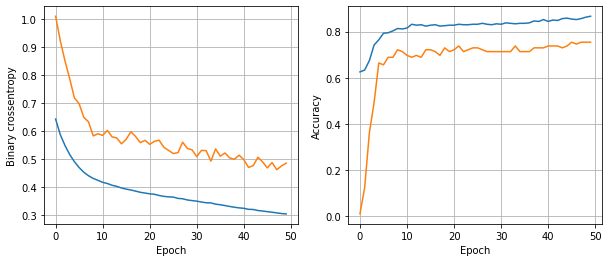

In [ ]:
plot_history(history)

In [ ]:
from keras.layers.regularization.spatial_dropout3d import Dropout
from keras import layers
from keras.callbacks import Callback
def train_model(X_train, y_train, num_nodes, dropout_prob,lr,batch_size, epochs):
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(8,)),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_nodes, activation='relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1, activation='sigmoid') 

  ])
  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy',
                   metrics=['accuracy'])
  history= nn_model.fit(
      X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0
  )
  return nn_model, history

32 nodes, dropout 0, lr 0.01, batch size 128


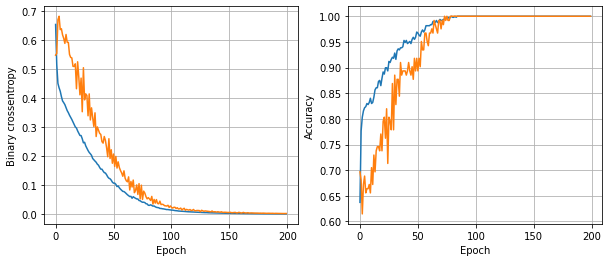

5/5 [==============================] - 0s 4ms/step - loss: 3.4136 - accuracy: 0.6234
32 nodes, dropout 0, lr 0.01, batch size 256


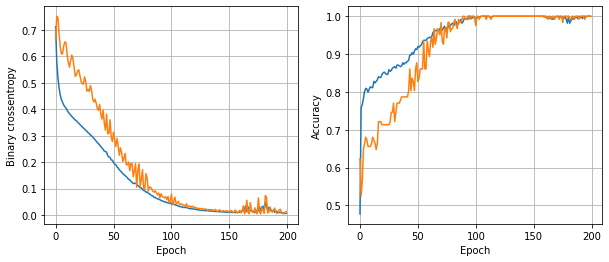

5/5 [==============================] - 0s 3ms/step - loss: 2.9557 - accuracy: 0.6688
32 nodes, dropout 0, lr 0.01, batch size 512


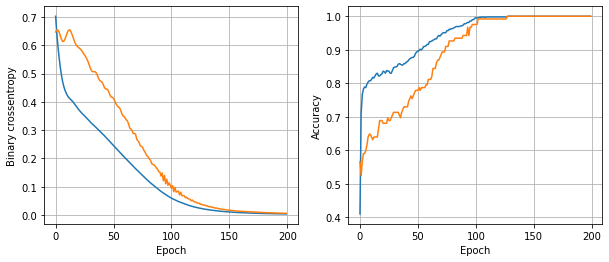

5/5 [==============================] - 0s 6ms/step - loss: 3.4518 - accuracy: 0.6558
32 nodes, dropout 0, lr 0.005, batch size 128


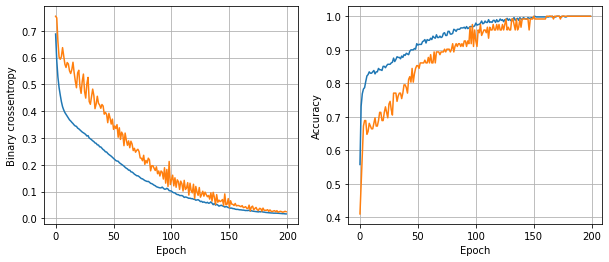

5/5 [==============================] - 0s 3ms/step - loss: 2.3858 - accuracy: 0.6169
32 nodes, dropout 0, lr 0.005, batch size 256


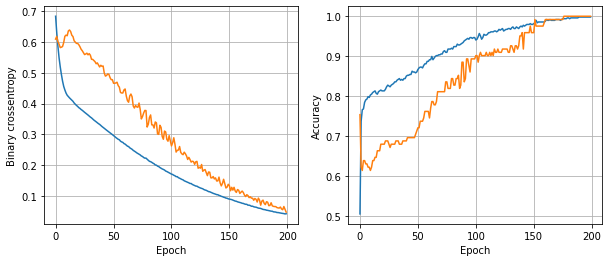

5/5 [==============================] - 0s 3ms/step - loss: 1.8926 - accuracy: 0.6299
32 nodes, dropout 0, lr 0.005, batch size 512


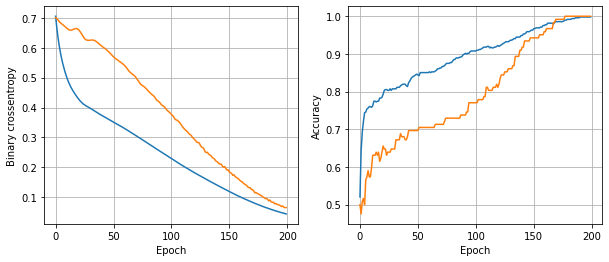

5/5 [==============================] - 0s 4ms/step - loss: 1.6506 - accuracy: 0.6558
32 nodes, dropout 0, lr 0.001, batch size 128


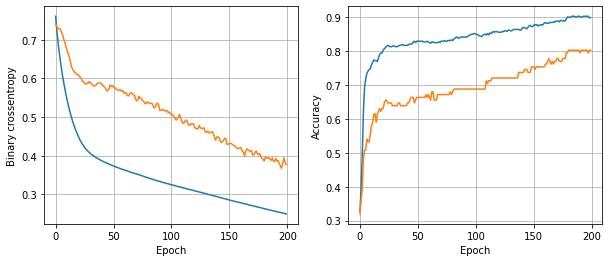

5/5 [==============================] - 0s 4ms/step - loss: 0.7933 - accuracy: 0.6818
32 nodes, dropout 0, lr 0.001, batch size 256


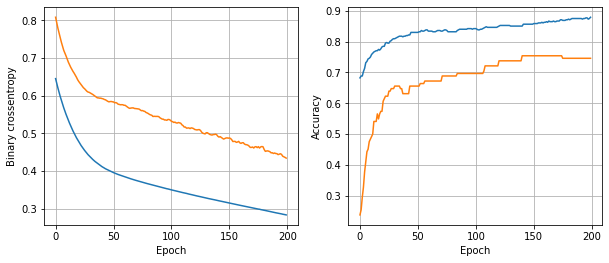

5/5 [==============================] - 0s 4ms/step - loss: 0.7438 - accuracy: 0.6883
32 nodes, dropout 0, lr 0.001, batch size 512


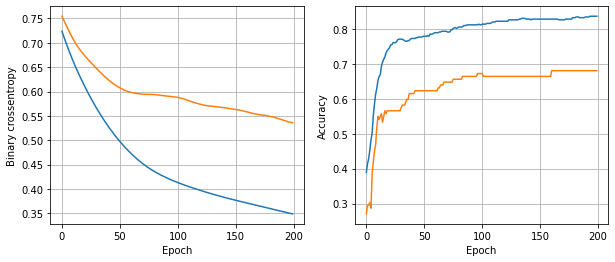

5/5 [==============================] - 0s 4ms/step - loss: 0.6623 - accuracy: 0.6688
32 nodes, dropout 0.2, lr 0.01, batch size 128


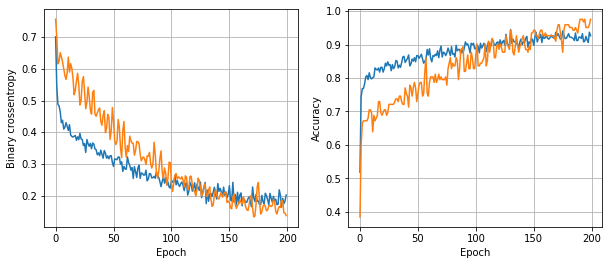

5/5 [==============================] - 0s 4ms/step - loss: 1.4718 - accuracy: 0.6688
32 nodes, dropout 0.2, lr 0.01, batch size 256


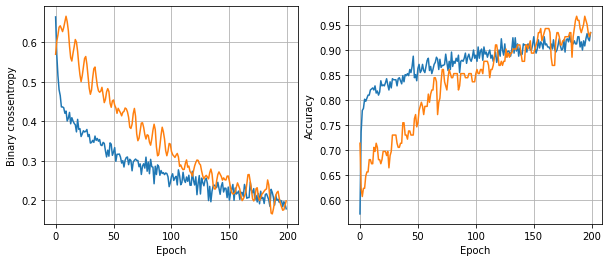

5/5 [==============================] - 0s 4ms/step - loss: 1.1144 - accuracy: 0.6818
32 nodes, dropout 0.2, lr 0.01, batch size 512


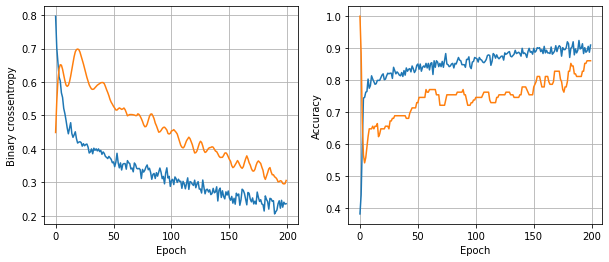

5/5 [==============================] - 0s 4ms/step - loss: 1.0050 - accuracy: 0.6429
32 nodes, dropout 0.2, lr 0.005, batch size 128


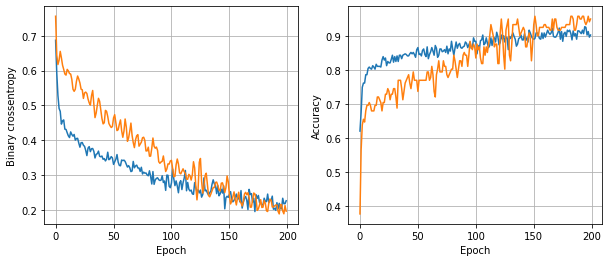

5/5 [==============================] - 0s 4ms/step - loss: 1.0322 - accuracy: 0.6558
32 nodes, dropout 0.2, lr 0.005, batch size 256


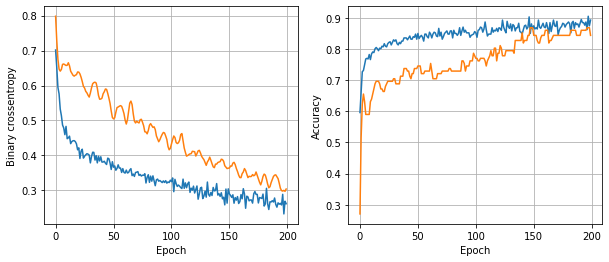

5/5 [==============================] - 0s 7ms/step - loss: 0.9135 - accuracy: 0.6688
32 nodes, dropout 0.2, lr 0.005, batch size 512


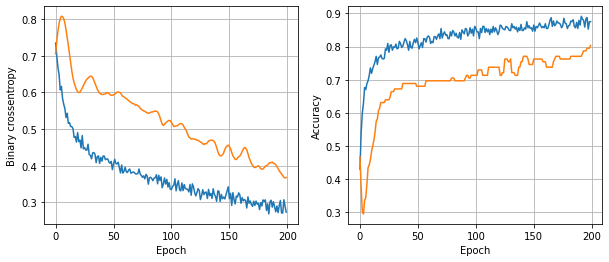

5/5 [==============================] - 0s 3ms/step - loss: 0.7905 - accuracy: 0.6753
32 nodes, dropout 0.2, lr 0.001, batch size 128


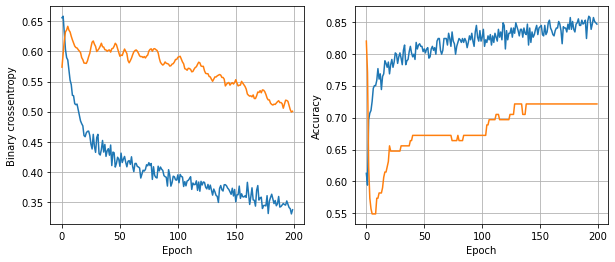

5/5 [==============================] - 0s 4ms/step - loss: 0.6769 - accuracy: 0.6753
32 nodes, dropout 0.2, lr 0.001, batch size 256


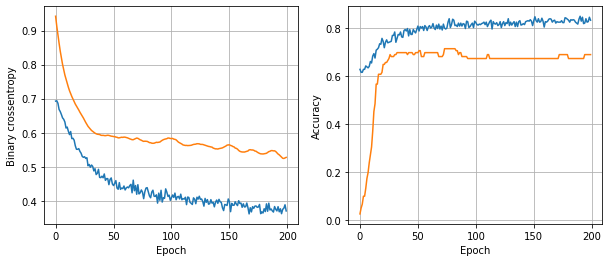

5/5 [==============================] - 0s 5ms/step - loss: 0.6554 - accuracy: 0.6753
32 nodes, dropout 0.2, lr 0.001, batch size 512


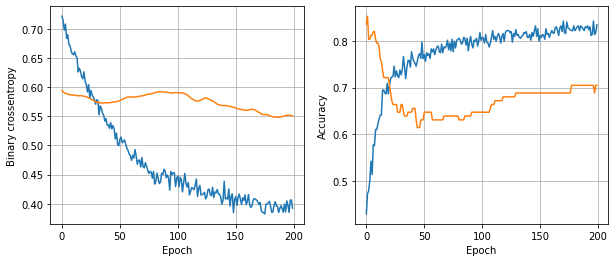

5/5 [==============================] - 0s 4ms/step - loss: 0.6467 - accuracy: 0.6883
64 nodes, dropout 0, lr 0.01, batch size 128


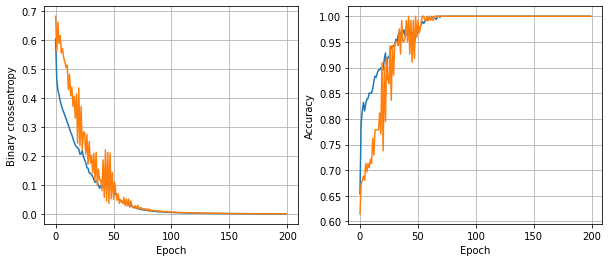

5/5 [==============================] - 0s 5ms/step - loss: 3.7251 - accuracy: 0.6429
64 nodes, dropout 0, lr 0.01, batch size 256


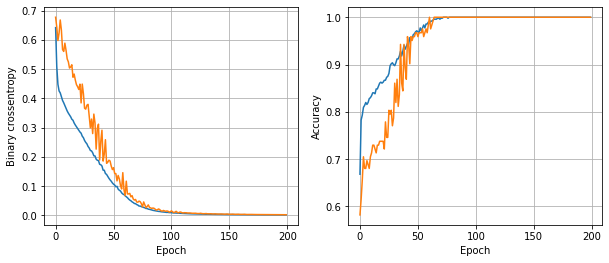

5/5 [==============================] - 0s 4ms/step - loss: 3.6561 - accuracy: 0.6299
64 nodes, dropout 0, lr 0.01, batch size 512


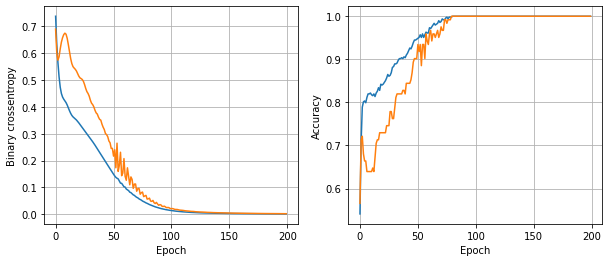

5/5 [==============================] - 0s 3ms/step - loss: 3.0264 - accuracy: 0.6558
64 nodes, dropout 0, lr 0.005, batch size 128


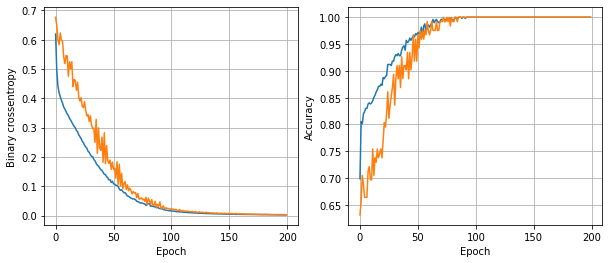

5/5 [==============================] - 0s 5ms/step - loss: 3.1774 - accuracy: 0.6623
64 nodes, dropout 0, lr 0.005, batch size 256


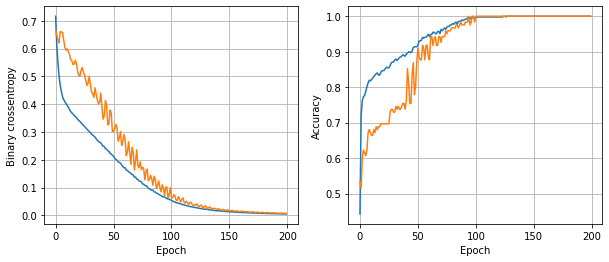

5/5 [==============================] - 0s 4ms/step - loss: 2.2811 - accuracy: 0.6688
64 nodes, dropout 0, lr 0.005, batch size 512


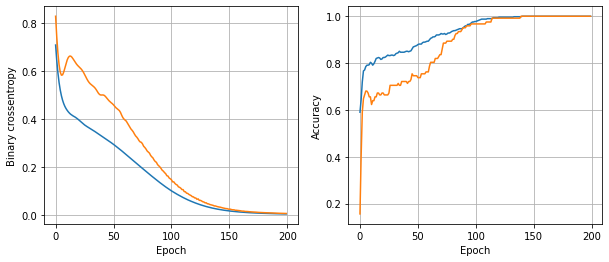

5/5 [==============================] - 0s 3ms/step - loss: 2.3169 - accuracy: 0.6494
64 nodes, dropout 0, lr 0.001, batch size 128


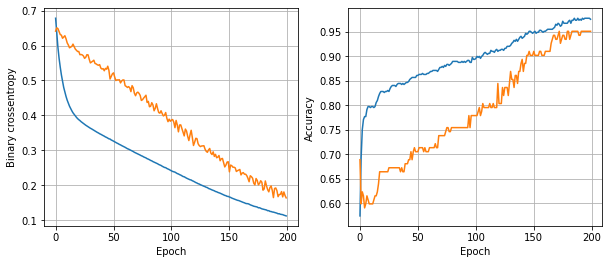

5/5 [==============================] - 0s 5ms/step - loss: 1.0312 - accuracy: 0.6364
64 nodes, dropout 0, lr 0.001, batch size 256


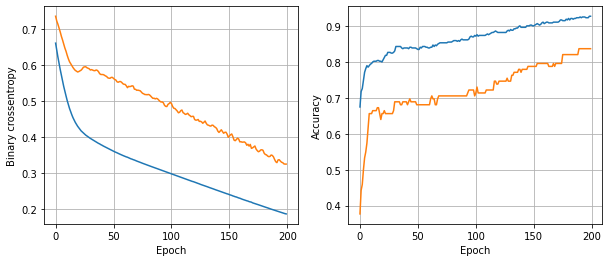

5/5 [==============================] - 0s 3ms/step - loss: 0.9205 - accuracy: 0.6429
64 nodes, dropout 0, lr 0.001, batch size 512


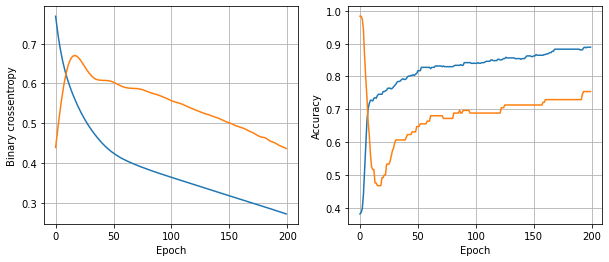

5/5 [==============================] - 0s 4ms/step - loss: 0.7525 - accuracy: 0.6558
64 nodes, dropout 0.2, lr 0.01, batch size 128


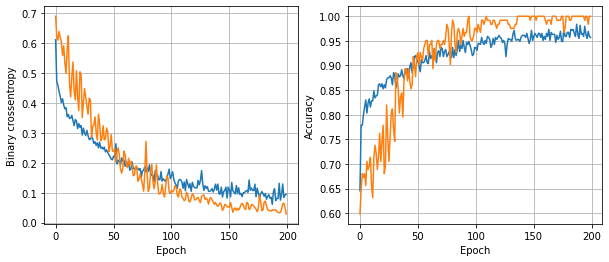

5/5 [==============================] - 0s 4ms/step - loss: 1.8047 - accuracy: 0.6494
64 nodes, dropout 0.2, lr 0.01, batch size 256


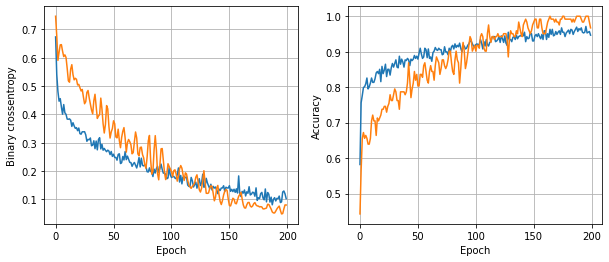

5/5 [==============================] - 0s 4ms/step - loss: 1.8349 - accuracy: 0.6494
64 nodes, dropout 0.2, lr 0.01, batch size 512


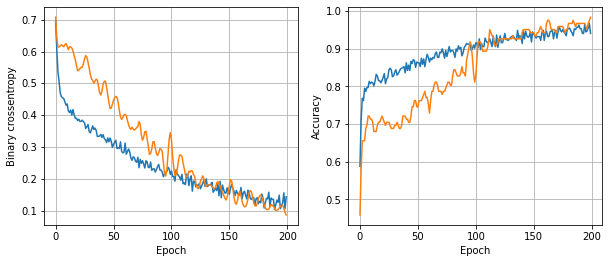

5/5 [==============================] - 0s 3ms/step - loss: 1.4247 - accuracy: 0.6558
64 nodes, dropout 0.2, lr 0.005, batch size 128


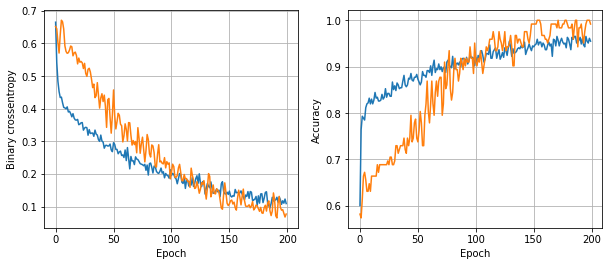

5/5 [==============================] - 0s 4ms/step - loss: 1.5086 - accuracy: 0.6429
64 nodes, dropout 0.2, lr 0.005, batch size 256


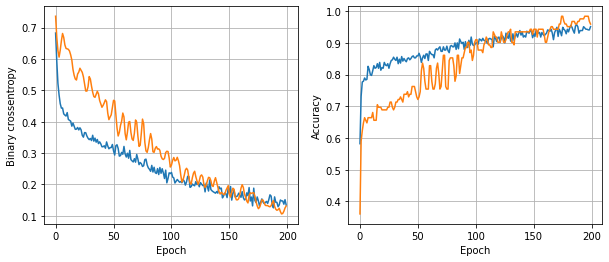

5/5 [==============================] - 0s 5ms/step - loss: 1.1675 - accuracy: 0.6753
64 nodes, dropout 0.2, lr 0.005, batch size 512


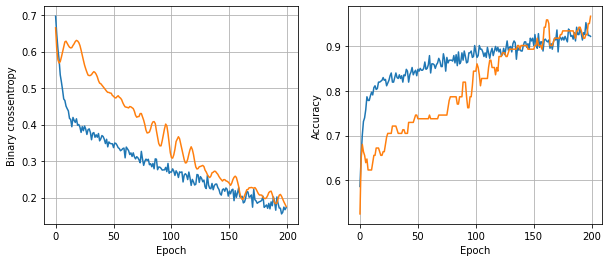

5/5 [==============================] - 0s 5ms/step - loss: 1.2232 - accuracy: 0.6494
64 nodes, dropout 0.2, lr 0.001, batch size 128


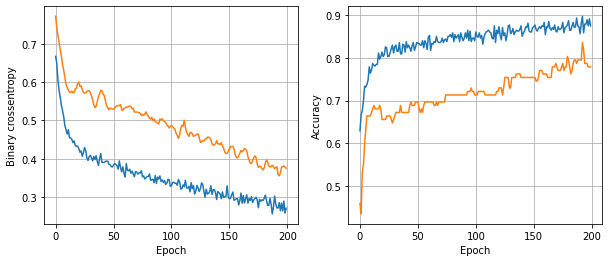

5/5 [==============================] - 0s 4ms/step - loss: 0.8120 - accuracy: 0.6818
64 nodes, dropout 0.2, lr 0.001, batch size 256


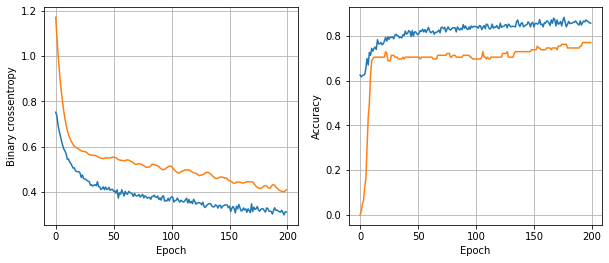

5/5 [==============================] - 0s 4ms/step - loss: 0.7359 - accuracy: 0.6688
64 nodes, dropout 0.2, lr 0.001, batch size 512


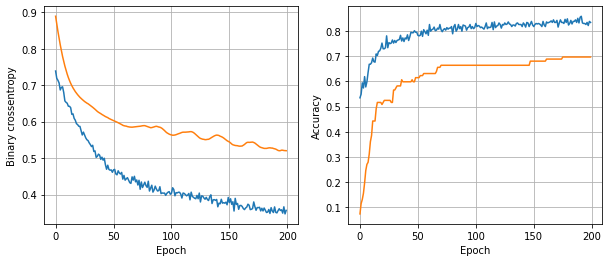

5/5 [==============================] - 0s 7ms/step - loss: 0.6800 - accuracy: 0.6818
128 nodes, dropout 0, lr 0.01, batch size 128


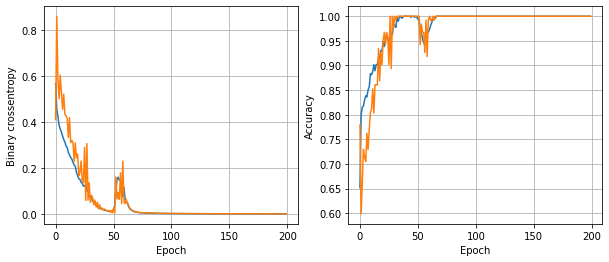

5/5 [==============================] - 0s 3ms/step - loss: 3.8552 - accuracy: 0.6494
128 nodes, dropout 0, lr 0.01, batch size 256


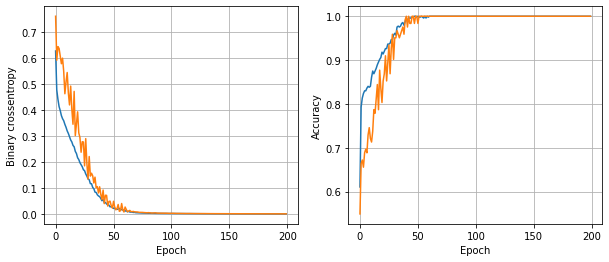

5/5 [==============================] - 0s 3ms/step - loss: 3.5072 - accuracy: 0.6558
128 nodes, dropout 0, lr 0.01, batch size 512


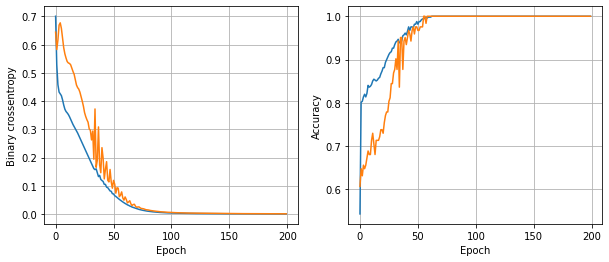

5/5 [==============================] - 0s 4ms/step - loss: 3.5079 - accuracy: 0.6558
128 nodes, dropout 0, lr 0.005, batch size 128


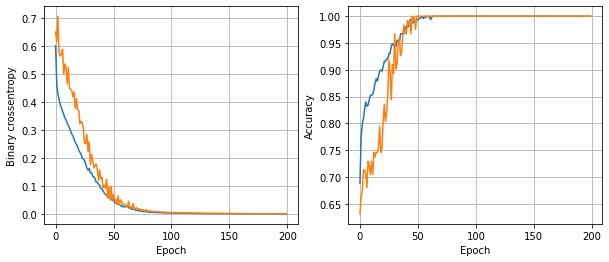

5/5 [==============================] - 0s 5ms/step - loss: 3.3854 - accuracy: 0.6688
128 nodes, dropout 0, lr 0.005, batch size 256


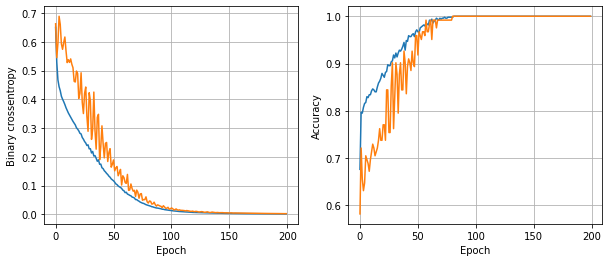

5/5 [==============================] - 0s 4ms/step - loss: 2.9922 - accuracy: 0.6364
128 nodes, dropout 0, lr 0.005, batch size 512


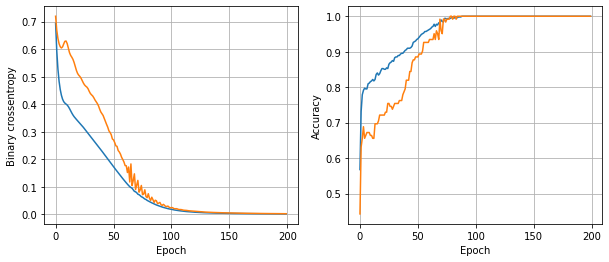

5/5 [==============================] - 0s 4ms/step - loss: 2.9628 - accuracy: 0.6688
128 nodes, dropout 0, lr 0.001, batch size 128


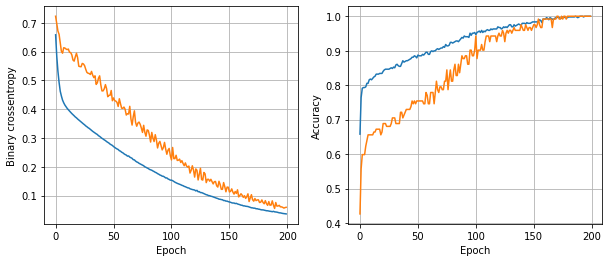

5/5 [==============================] - 0s 4ms/step - loss: 1.4903 - accuracy: 0.6883
128 nodes, dropout 0, lr 0.001, batch size 256


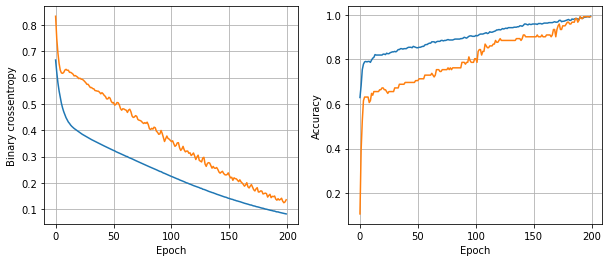

5/5 [==============================] - 0s 4ms/step - loss: 1.2692 - accuracy: 0.6494
128 nodes, dropout 0, lr 0.001, batch size 512


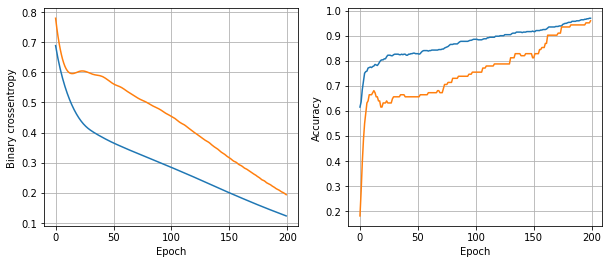

5/5 [==============================] - 0s 3ms/step - loss: 1.0508 - accuracy: 0.6558
128 nodes, dropout 0.2, lr 0.01, batch size 128


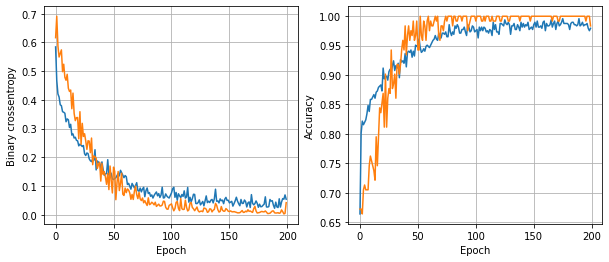

5/5 [==============================] - 0s 8ms/step - loss: 3.0681 - accuracy: 0.6623
128 nodes, dropout 0.2, lr 0.01, batch size 256


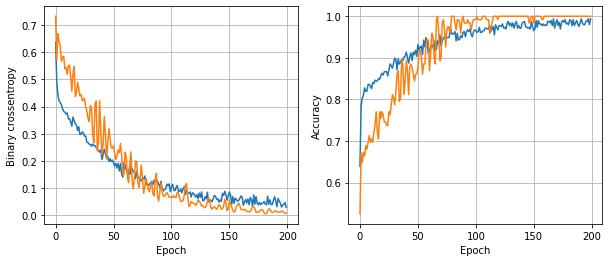

5/5 [==============================] - 0s 4ms/step - loss: 2.3771 - accuracy: 0.6429
128 nodes, dropout 0.2, lr 0.01, batch size 512


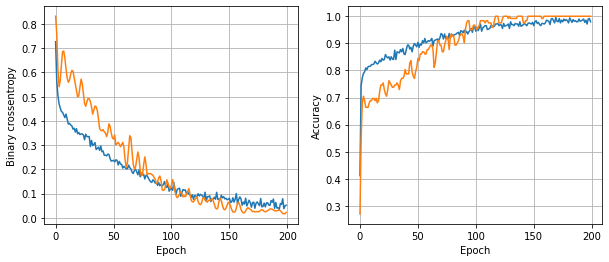

5/5 [==============================] - 0s 5ms/step - loss: 2.2978 - accuracy: 0.7013
128 nodes, dropout 0.2, lr 0.005, batch size 128


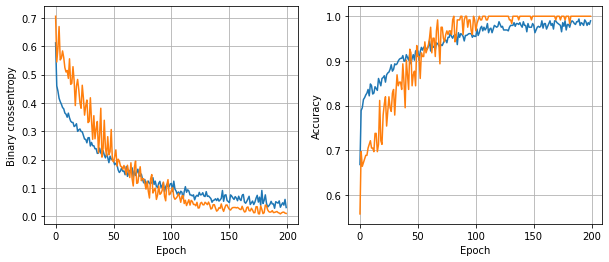

5/5 [==============================] - 0s 8ms/step - loss: 2.4640 - accuracy: 0.6494
128 nodes, dropout 0.2, lr 0.005, batch size 256


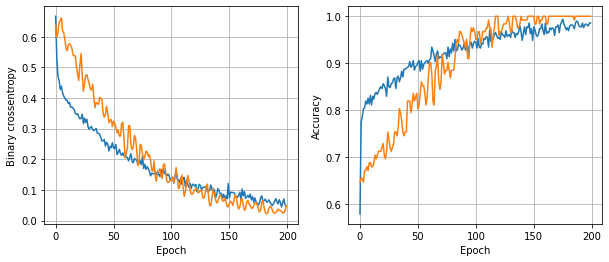

5/5 [==============================] - 0s 4ms/step - loss: 2.0521 - accuracy: 0.6623
128 nodes, dropout 0.2, lr 0.005, batch size 512


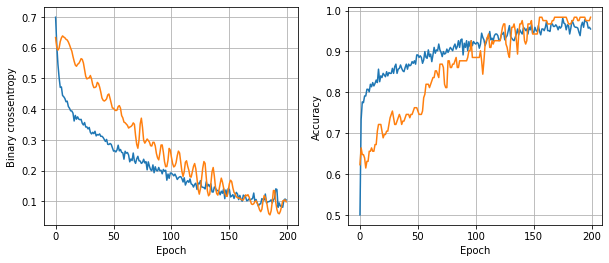

5/5 [==============================] - 0s 4ms/step - loss: 1.5557 - accuracy: 0.6753
128 nodes, dropout 0.2, lr 0.001, batch size 128


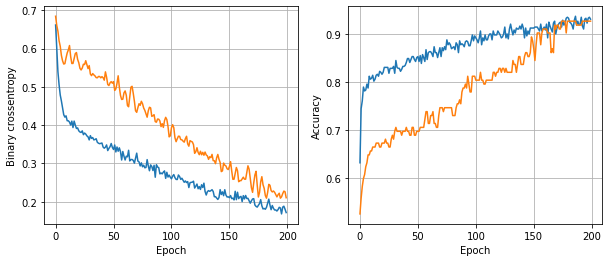

5/5 [==============================] - 0s 4ms/step - loss: 1.0795 - accuracy: 0.6753
128 nodes, dropout 0.2, lr 0.001, batch size 256


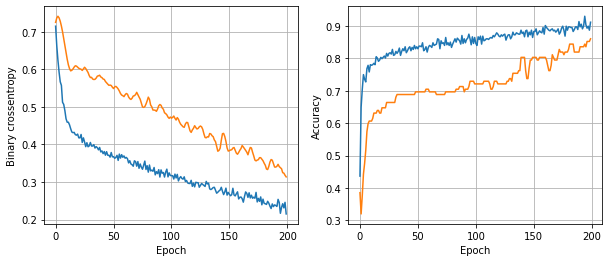

5/5 [==============================] - 0s 4ms/step - loss: 0.8694 - accuracy: 0.6818
128 nodes, dropout 0.2, lr 0.001, batch size 512


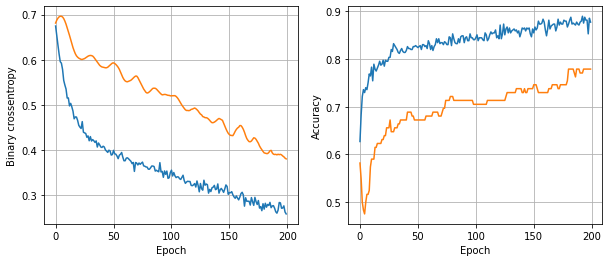

5/5 [==============================] - 0s 4ms/step - loss: 0.7964 - accuracy: 0.6688


In [ ]:
least_val_loss = float('inf')
least_loss_model = None
epochs=200
for num_nodes in [32, 64, 128]:
  for dropout_prob in[0, 0.2]:
    for lr in [0.01, 0.005, 0.001]:
      for batch_size in [128,256, 512]:
        print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
        model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        plot_history(history)
        val_loss = model.evaluate(X_valid, y_valid)[0]
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model

In [ ]:
pip install gradio


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.3/14.3 MB 48.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.9/140.9 KB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 KB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.5/106.5 KB 12.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 KB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 KB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.8/57.8 KB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 58.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 KB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 54.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 KB

**Deployment** **Model**

In [ ]:
# number of rows and Columns in this dataset
df.shape

(768, 9)

In [ ]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

0 = Non_Diabetic ,
1 = Positive Diabetic 

In [ ]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.30,109.98,68.18,19.66,68.79,30.30,0.43,31.19
1,4.87,141.26,70.82,22.16,100.34,35.14,0.55,37.07


In [ ]:
# separating the data and labels
X = df.drop(columns = 'Outcome', axis=1)
Y = df['Outcome']

In [ ]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0 33.60   
1              1       85             66             29        0 26.60   
2              8      183             64              0        0 23.30   
3              1       89             66             23       94 28.10   
4              0      137             40             35      168 43.10   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180 32.90   
764            2      122             70             27        0 36.80   
765            5      121             72             23      112 26.20   
766            1      126             60              0        0 30.10   
767            1       93             70             31        0 30.40   

     DiabetesPedigreeFunction  Age  
0                        0.63   50  
1                        0.35   31  


In [ ]:
print(y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


**Train Test Split**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


** Again**

In [ ]:


from sklearn import svm
classifier = svm.SVC(kernel='linear')
#training the support vector Machine Classifier
classifier.fit(X_train, Y_train)

SVC(kernel='linear')